In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from xgboost import XGBClassifier

In [2]:
df_original = pd.read_excel('./Zahra_Vahid_PTL_Dec052023.xlsx')
print(f'shape of original data: {df_original.shape}')
df_original.drop_duplicates(inplace=True)
print(f'shape of original data after removing duplicate rows: {df_original.shape}')
df_original.reset_index(inplace=True, drop=True)

shape of original data: (1612, 43)
shape of original data after removing duplicate rows: (1610, 43)


In [3]:
print(f'all columns : {df_original.columns}')
print('_____________________________________________')
print('_____________________________________________')
not_useful_cols = ['code', 'document', 'order', 'Mathernal Education (years)', 'Gravida 1', 'Para1', 'Ab', 'death', 
                  'resident', 'time', 'apgar1', 'apgar2', 'GA2']
df_after_drop_col = df_original.drop(not_useful_cols, axis = 1)
print(f'all useful columns: {df_after_drop_col.columns}')

all columns : Index(['code', 'document', 'order', 'Number_of_Fetus', 'Presentation',
       'Mathernal Education (years)', 'Mathernal_Level_of_Education',
       'Mathernal_Age_Year', 'Gravida 1', 'Gravidity', 'Para1', 'Parity', 'Ab',
       'History_of_Abortion', 'Number_of_Live_Children', 'death',
       'History_of_Child_Death', 'Delivery_Method',
       'Indication_of_Cesarean_Delivery', 'Pregnancy_Complication',
       'Indication_of_Termination', 'Fetal_Gender', 'Need_for_CPR',
       'Need_for_NICU_Admition', 'Corticosteroid_Administration',
       'Surfactant_Administration', 'Fetal_Anomaly', 'resident',
       'STATUS_dead_alive', 'time', 'apgar1', 'First_Minute_Apgar ', 'apgar2',
       'Fifth_Minute_Apgar', 'GA2', 'Gestational_Age_LessEqual_28weeks',
       'Gestational_Age_LessEqual_32weeks',
       'Gestational_Age_LessEqual_34weeks', 'Birth_Weight_gr',
       'Birth_Weight_LessEqual_2500gr', 'Birth_Weight_LessEqual2000gr',
       'Birth_Weight_LessEqual_1500gr', 'Birth_We

In [4]:
df_after_drop_col.isna().sum()

Number_of_Fetus                        0
Presentation                           0
Mathernal_Level_of_Education         149
Mathernal_Age_Year                     0
Gravidity                              0
Parity                                 0
History_of_Abortion                    0
Number_of_Live_Children                0
History_of_Child_Death                 0
Delivery_Method                        0
Indication_of_Cesarean_Delivery        0
Pregnancy_Complication                 0
Indication_of_Termination              0
Fetal_Gender                           0
Need_for_CPR                           0
Need_for_NICU_Admition                 0
Corticosteroid_Administration          0
Surfactant_Administration              0
Fetal_Anomaly                          0
STATUS_dead_alive                      0
First_Minute_Apgar                     0
Fifth_Minute_Apgar                     0
Gestational_Age_LessEqual_28weeks     80
Gestational_Age_LessEqual_32weeks     80
Gestational_Age_

In [5]:
df_after_drop_col.isna().sum().sum()

809

In [6]:
df_after_drop_col.STATUS_dead_alive.value_counts()

1    1463
2     147
Name: STATUS_dead_alive, dtype: int64

In [7]:
df_after_drop_col.STATUS_dead_alive.value_counts()

1    1463
2     147
Name: STATUS_dead_alive, dtype: int64

In [8]:
df_after_drop_col['Mathernal_Level_of_Education'] = df_after_drop_col['Mathernal_Level_of_Education'].fillna(2)
print(f'lables: {set(df_after_drop_col.STATUS_dead_alive.unique())}')
print(f'number of sample before removing rows with Nan: {df_after_drop_col.shape[0]}')
df = df_after_drop_col.dropna() 
print(f'number of sample after removing rows with Nan: {df.shape[0]}')

lables: {1, 2}
number of sample before removing rows with Nan: 1610
number of sample after removing rows with Nan: 1449


In [9]:
df.shape     # df is our final revised dataset

(1449, 30)

In [10]:
df.isna().sum()

Number_of_Fetus                      0
Presentation                         0
Mathernal_Level_of_Education         0
Mathernal_Age_Year                   0
Gravidity                            0
Parity                               0
History_of_Abortion                  0
Number_of_Live_Children              0
History_of_Child_Death               0
Delivery_Method                      0
Indication_of_Cesarean_Delivery      0
Pregnancy_Complication               0
Indication_of_Termination            0
Fetal_Gender                         0
Need_for_CPR                         0
Need_for_NICU_Admition               0
Corticosteroid_Administration        0
Surfactant_Administration            0
Fetal_Anomaly                        0
STATUS_dead_alive                    0
First_Minute_Apgar                   0
Fifth_Minute_Apgar                   0
Gestational_Age_LessEqual_28weeks    0
Gestational_Age_LessEqual_32weeks    0
Gestational_Age_LessEqual_34weeks    0
Birth_Weight_gr          

In [11]:
df.isna().sum().sum()

0

In [12]:
df.shape

(1449, 30)

In [13]:
# 1: alive and 2: Dead ----> 0: alive and 1: Dead#
df['STATUS_dead_alive'] = df['STATUS_dead_alive'].replace({1: 0, 2: 1})

C:\Users\vahid\AppData\Local\Temp\ipykernel_19272\3152065061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATUS_dead_alive'] = df['STATUS_dead_alive'].replace({1: 0, 2: 1})


In [14]:
print(df.isna().sum())

Number_of_Fetus                      0
Presentation                         0
Mathernal_Level_of_Education         0
Mathernal_Age_Year                   0
Gravidity                            0
Parity                               0
History_of_Abortion                  0
Number_of_Live_Children              0
History_of_Child_Death               0
Delivery_Method                      0
Indication_of_Cesarean_Delivery      0
Pregnancy_Complication               0
Indication_of_Termination            0
Fetal_Gender                         0
Need_for_CPR                         0
Need_for_NICU_Admition               0
Corticosteroid_Administration        0
Surfactant_Administration            0
Fetal_Anomaly                        0
STATUS_dead_alive                    0
First_Minute_Apgar                   0
Fifth_Minute_Apgar                   0
Gestational_Age_LessEqual_28weeks    0
Gestational_Age_LessEqual_32weeks    0
Gestational_Age_LessEqual_34weeks    0
Birth_Weight_gr          

In [15]:
import pandas as pd
import numpy as np

# Assuming you already have your DataFrame 'df' with columns 'Mathernal_Age_Year' and 'Birth_Weight_gr'

# Calculate the Z-scores for the 'Mathernal_Age_Year' and 'Birth_Weight_gr' columns
z_scores = (df[['Mathernal_Age_Year', 'Birth_Weight_gr']] - df[['Mathernal_Age_Year', 'Birth_Weight_gr']].mean()) / df[['Mathernal_Age_Year', 'Birth_Weight_gr']].std()

# Set your threshold for anomaly detection (e.g., 3.0 for a common threshold)
threshold = 2.5

# Identify outliers based on the threshold
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Filter your original DataFrame to keep only the non-outliers
df = df[~outliers]
# Assuming you have an 'anomaly' column in your DataFrame 'df' that you want to remove
# df.drop(columns=['anomaly'], inplace=True)


In [16]:
df.shape

(1414, 30)

Sensitivity (Train): 0.9560439560439561
Specificity (Train): 0.9989680082559339
Accuracy (Train): 0.9952830188679245
Precision (Train): 0.9886363636363636
Positive Predictive Value (Train): 0.9886363636363636
Negative Predictive Value (Train): 0.9958847736625515
Positive Likelihood Ratio (Train): 926.4065934065495
Negative Likelihood Ratio (Train): 0.04400145309236214
Sensitivity (Test): 0.8333333333333334
Specificity (Test): 0.990909090909091
Accuracy (Test): 0.980225988700565
Precision (Test): 0.8695652173913043
Positive Predictive Value (Test): 0.8695652173913043
Negative Predictive Value (Test): 0.9879154078549849
Positive Likelihood Ratio (Test): 91.6666666666672
Negative Likelihood Ratio (Test): 0.1681957186544342
ROC AUC (Train): 0.9775059821499451
ROC AUC (Test): 0.9121212121212122
F1 Score for Train Set: 0.9720670391061453
F1 Score for Test Set: 0.851063829787234
Training Set - True Positive: 968
Training Set - False Positive: 1
Training Set - False Negative: 4
Training Set - 

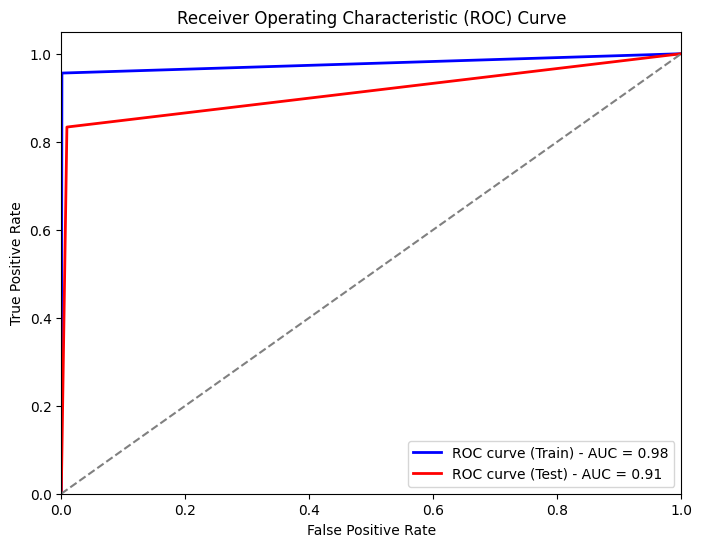

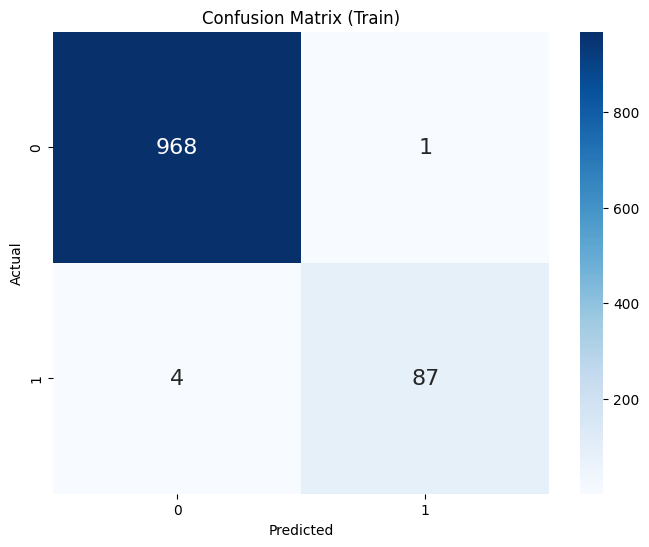

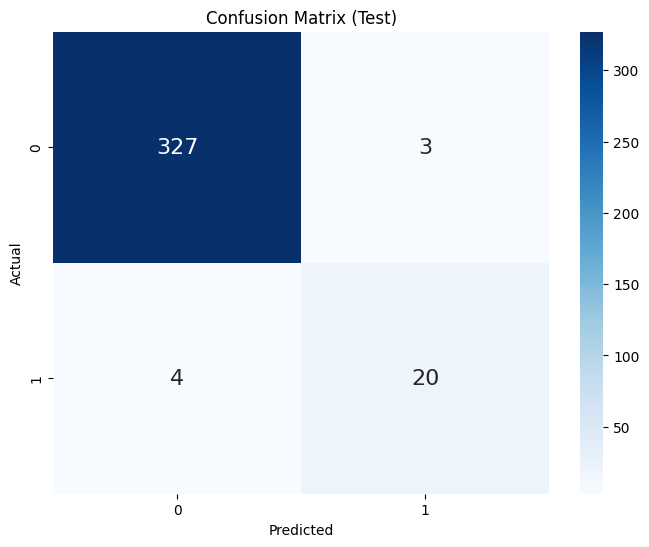

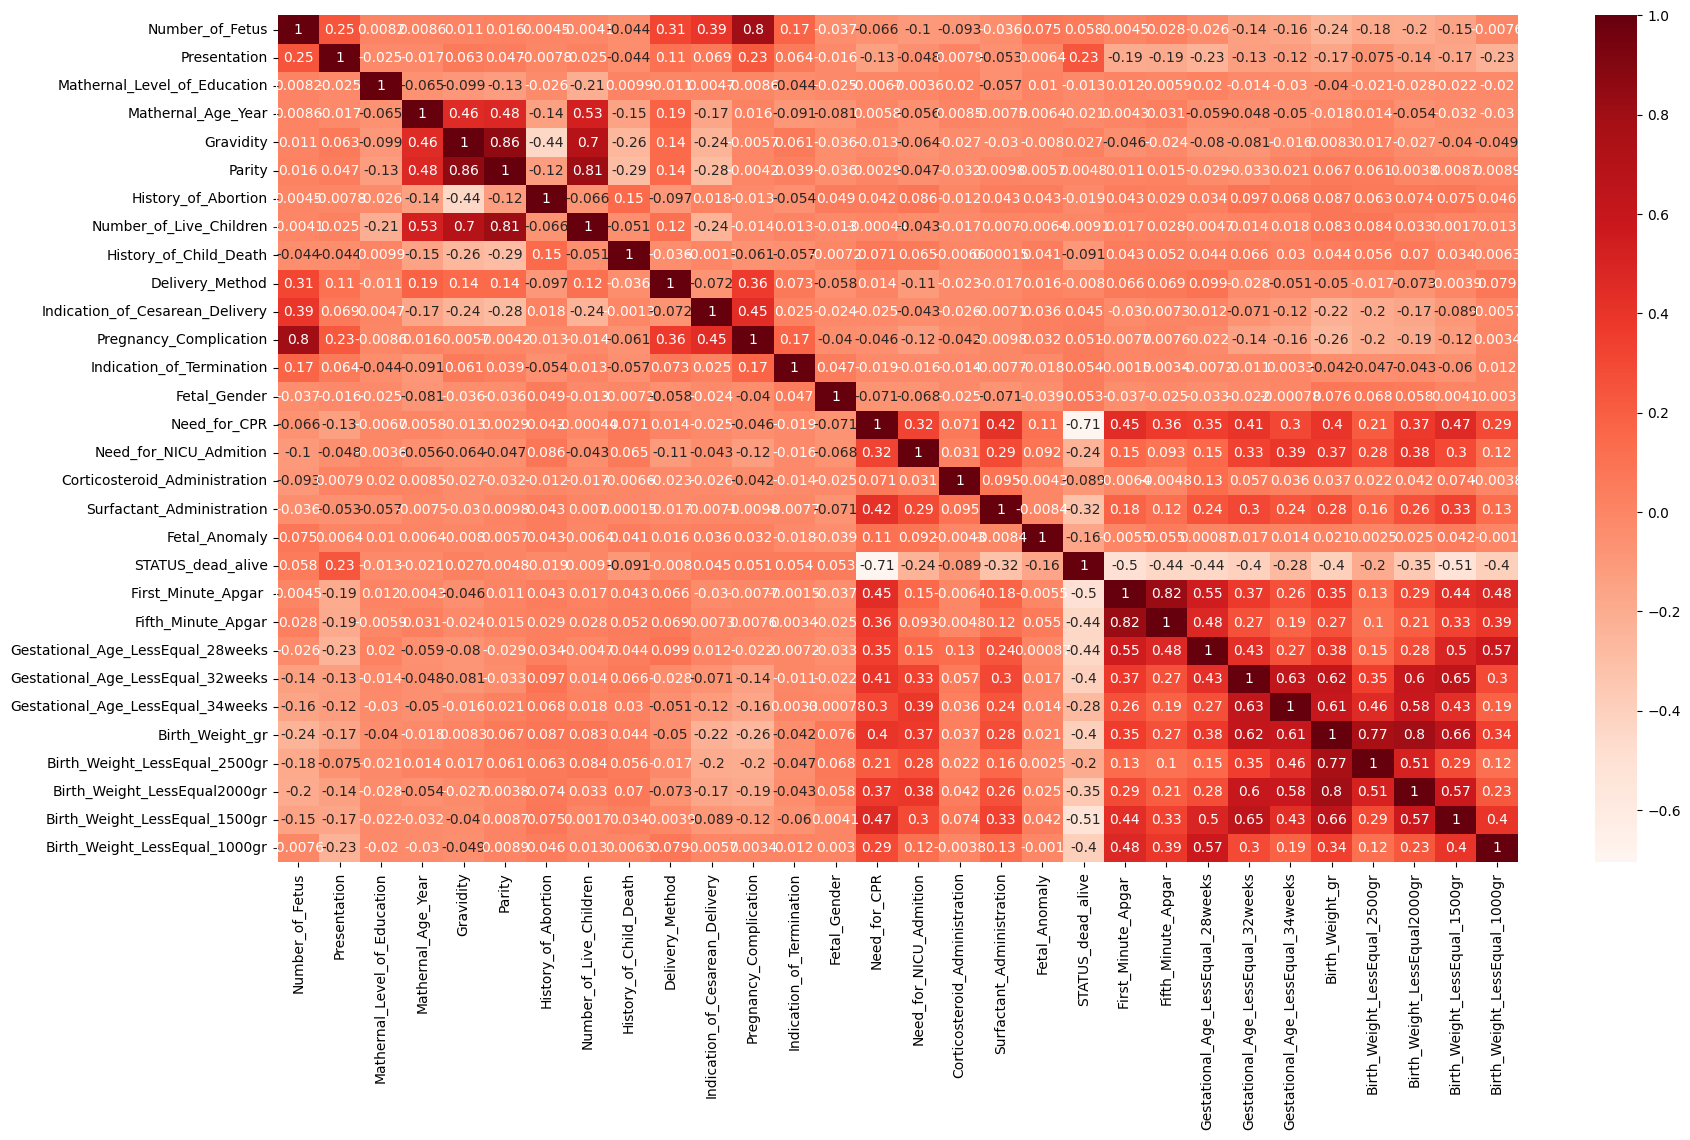

In [17]:
## FINAL CODE  ###
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Define your numeric and categorical features
numeric_features = ['Mathernal_Age_Year', 'Birth_Weight_gr']
categorical_features = ['Number_of_Fetus', 'Presentation', 'Mathernal_Level_of_Education',
       'Gravidity', 'Parity', 'History_of_Abortion',
       'Number_of_Live_Children', 'History_of_Child_Death', 'Delivery_Method',
       'Indication_of_Cesarean_Delivery', 'Pregnancy_Complication',
       'Indication_of_Termination', 'Fetal_Gender', 'Need_for_CPR',
       'Need_for_NICU_Admition', 'Corticosteroid_Administration',
       'Surfactant_Administration', 'Fetal_Anomaly',
       'First_Minute_Apgar ', 'Fifth_Minute_Apgar',
       'Gestational_Age_LessEqual_28weeks',
       'Gestational_Age_LessEqual_32weeks',
       'Gestational_Age_LessEqual_34weeks',
       'Birth_Weight_LessEqual_2500gr', 'Birth_Weight_LessEqual2000gr',
       'Birth_Weight_LessEqual_1500gr', 'Birth_Weight_LessEqual_1000gr']

# Split your data into training and testing sets
X = df.drop(columns=['STATUS_dead_alive'])
y = df['STATUS_dead_alive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create individual classifiers with class weights
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 10, 1: 100}))
])

# Upsample the minority class (class 1) for GradientBoostingClassifier
smote = SMOTE(random_state=42, sampling_strategy={1: 100})
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

gb_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

# Upsample the minority class (class 1) for AdaBoostClassifier
smote = SMOTE(random_state=42, sampling_strategy={1: 100})
X_train_upsampled_ada, y_train_upsampled_ada = smote.fit_resample(X_train, y_train)

ada_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=100, random_state=42))
])

# Create a VotingClassifier that combines the individual classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('RandomForest', rf_classifier),
    ('GradientBoosting', gb_classifier),
    ('AdaBoost', ada_classifier)
])

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the train and test data
y_train_pred = ensemble_classifier.predict(X_train)
y_test_pred = ensemble_classifier.predict(X_test)

# Calculate True Positives, False Positives, True Negatives, and False Negatives
tp_train = np.sum((y_train == 1) & (y_train_pred == 1))
fp_train = np.sum((y_train == 0) & (y_train_pred == 1))
tn_train = np.sum((y_train == 0) & (y_train_pred == 0))
fn_train = np.sum((y_train == 1) & (y_train_pred == 0))

tp_test = np.sum((y_test == 1) & (y_test_pred == 1))
fp_test = np.sum((y_test == 0) & (y_test_pred == 1))
tn_test = np.sum((y_test == 0) & (y_test_pred == 0))
fn_test = np.sum((y_test == 1) & (y_test_pred == 0))


# Calculate ROC AUC for train and test sets
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Calculate Sensitivity (True Positive Rate) and Specificity (True Negative Rate)
sensitivity_train = tp_train / (tp_train + fn_train)
specificity_train = tn_train / (tn_train + fp_train)

sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate Accuracy
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)

# Calculate Precision (Positive Predictive Value) and Negative Predictive Value
precision_train = tp_train / (tp_train + fp_train)
ppv_train = precision_train  # Positive Predictive Value is the same as Precision

precision_test = tp_test / (tp_test + fp_test)
ppv_test = precision_test  # Positive Predictive Value is the same as Precision

npv_train = tn_train / (tn_train + fn_train)
npv_test = tn_test / (tn_test + fn_test)

# Calculate Positive Likelihood Ratio (PLR) and Negative Likelihood Ratio (NLR)
plr_train = sensitivity_train / (1 - specificity_train)
nlr_train = (1 - sensitivity_train) / specificity_train

plr_test = sensitivity_test / (1 - specificity_test)
nlr_test = (1 - sensitivity_test) / specificity_test
 
# Calculate confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, and FN from the confusion matrices
tp_train, fp_train, fn_train, tn_train = confusion_matrix_train.ravel()
tp_test, fp_test, fn_test, tn_test = confusion_matrix_test.ravel()
   
    
# Print the results
print(f"Sensitivity (Train): {sensitivity_train}")
print(f"Specificity (Train): {specificity_train}")
print(f"Accuracy (Train): {accuracy_train}")
print(f"Precision (Train): {precision_train}")
print(f"Positive Predictive Value (Train): {ppv_train}")
print(f"Negative Predictive Value (Train): {npv_train}")
print(f"Positive Likelihood Ratio (Train): {plr_train}")
print(f"Negative Likelihood Ratio (Train): {nlr_train}")

print(f"Sensitivity (Test): {sensitivity_test}")
print(f"Specificity (Test): {specificity_test}")
print(f"Accuracy (Test): {accuracy_test}")
print(f"Precision (Test): {precision_test}")
print(f"Positive Predictive Value (Test): {ppv_test}")
print(f"Negative Predictive Value (Test): {npv_test}")
print(f"Positive Likelihood Ratio (Test): {plr_test}")
print(f"Negative Likelihood Ratio (Test): {nlr_test}")

# Print ROC AUC for train and test sets
print(f"ROC AUC (Train): {roc_auc_train}")
print(f"ROC AUC (Test): {roc_auc_test}") 
# Calculate and print F1 scores for train and test sets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"F1 Score for Train Set: {f1_train}")
print(f"F1 Score for Test Set: {f1_test}")

# Print True Positive, False Positive, False Negative, and True Negative for the training set
print(f"Training Set - True Positive: {tp_train}")
print(f"Training Set - False Positive: {fp_train}")
print(f"Training Set - False Negative: {fn_train}")
print(f"Training Set - True Negative: {tn_train}")

# Print True Positive, False Positive, False Negative, and True Negative for the test set
print(f"Test Set - True Positive: {tp_test}")
print(f"Test Set - False Positive: {fp_test}")
print(f"Test Set - False Negative: {fn_test}")
print(f"Test Set - True Negative: {tn_test}")






from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

# Calculate ROC curve and AUC for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train) - AUC = {:.2f}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (Test) - AUC = {:.2f}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Plot confusion matrix for train set
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train)')
plt.show()

# Plot confusion matrix for test set
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns 
#Using Pearson Correlation
plt.figure(figsize=(20,11))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Figure size 1200x700 with 0 Axes>

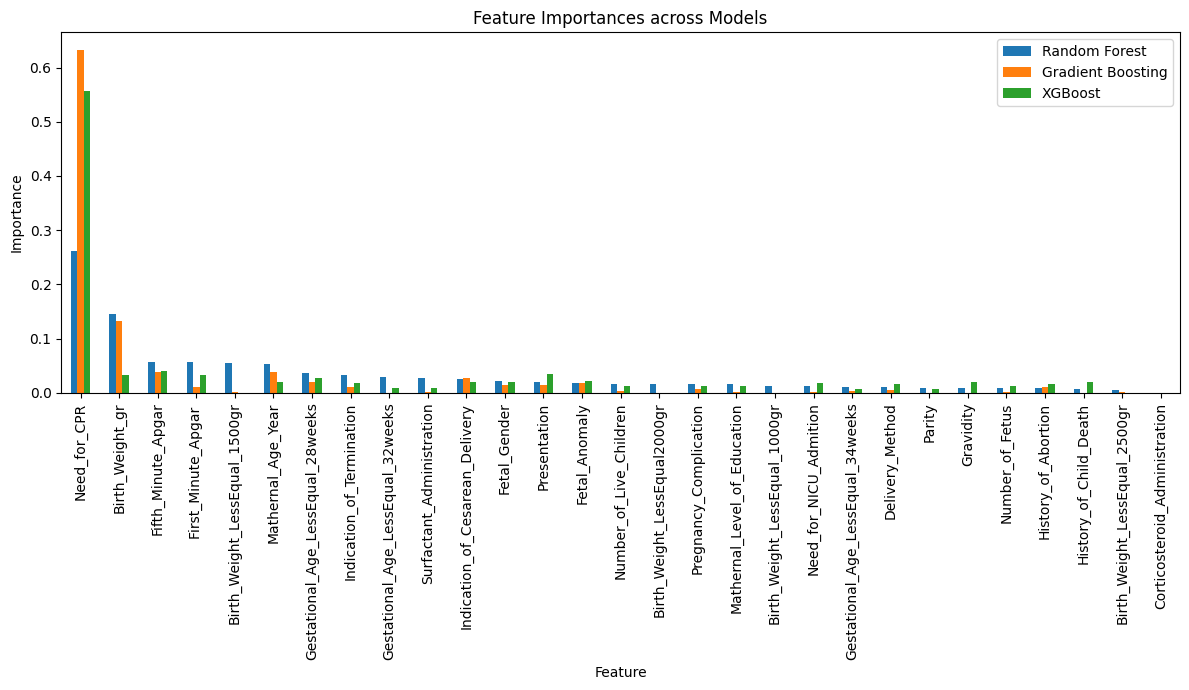

,Feature,Random Forest,Gradient Boosting,XGBoost
14,Need_for_CPR,0.262546,0.633304,0.556882
24,Birth_Weight_gr,0.145123,0.132975,0.033669
20,Fifth_Minute_Apgar,0.056466,0.038706,0.039522
19,First_Minute_Apgar,0.056188,0.010162,0.033290
27,Birth_Weight_LessEqual_1500gr,0.054377,0.000916,0.000000
3,Mathernal_Age_Year,0.052350,0.039079,0.019971
21,Gestational_Age_LessEqual_28weeks,0.036522,0.019302,0.026678
12,Indication_of_Termination,0.032577,0.010828,0.017500
22,Gestational_Age_LessEqual_32weeks,0.028725,0.000402,0.008359
17,Surfactant_Administration,0.026577,0.002411,0.009215


In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Define your feature names here
feature_names = ['Number_of_Fetus', 'Presentation', 'Mathernal_Level_of_Education',
       'Mathernal_Age_Year', 'Gravidity', 'Parity', 'History_of_Abortion',
       'Number_of_Live_Children', 'History_of_Child_Death', 'Delivery_Method',
       'Indication_of_Cesarean_Delivery', 'Pregnancy_Complication',
       'Indication_of_Termination', 'Fetal_Gender', 'Need_for_CPR',
       'Need_for_NICU_Admition', 'Corticosteroid_Administration',
       'Surfactant_Administration', 'Fetal_Anomaly',
       'First_Minute_Apgar ', 'Fifth_Minute_Apgar',
       'Gestational_Age_LessEqual_28weeks',
       'Gestational_Age_LessEqual_32weeks',
       'Gestational_Age_LessEqual_34weeks', 'Birth_Weight_gr',
       'Birth_Weight_LessEqual_2500gr', 'Birth_Weight_LessEqual2000gr',
       'Birth_Weight_LessEqual_1500gr', 'Birth_Weight_LessEqual_1000gr'
]

# Define the models
rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the models to the resampled training data
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Get feature importances
rf_importances = rf_model.feature_importances_
gbm_importances = gbm_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': rf_importances,
    'Gradient Boosting': gbm_importances,
    'XGBoost': xgb_importances
})

# Sort by importance for the random forest model
feature_importances_df = feature_importances_df.sort_values(by='Random Forest', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 7))
feature_importances_df.plot(x='Feature', y=['Random Forest', 'Gradient Boosting', 'XGBoost'], kind='bar', figsize=(12, 7))
plt.title('Feature Importances across Models')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Return the feature importances dataframe for display
feature_importances_df


In [19]:
# Calculate the average feature importance
feature_importances_df['Average_Feature_Importance'] = feature_importances_df[['Random Forest', 'Gradient Boosting', 'XGBoost']].mean(axis=1)

# Sort by average importance in descending order
average_feature_importance_df = feature_importances_df.sort_values(by='Average_Feature_Importance', ascending=False)

# Display the sorted dataframe
print(average_feature_importance_df[['Feature', 'Average_Feature_Importance']])


                              Feature  Average_Feature_Importance
14                       Need_for_CPR                    0.484244
24                    Birth_Weight_gr                    0.103922
20                 Fifth_Minute_Apgar                    0.044898
3                  Mathernal_Age_Year                    0.037133
19                First_Minute_Apgar                     0.033213
21  Gestational_Age_LessEqual_28weeks                    0.027501
10    Indication_of_Cesarean_Delivery                    0.024738
1                        Presentation                    0.022962
12          Indication_of_Termination                    0.020302
18                      Fetal_Anomaly                    0.019637
13                       Fetal_Gender                    0.018843
27      Birth_Weight_LessEqual_1500gr                    0.018431
17          Surfactant_Administration                    0.012734
22  Gestational_Age_LessEqual_32weeks                    0.012495
6         

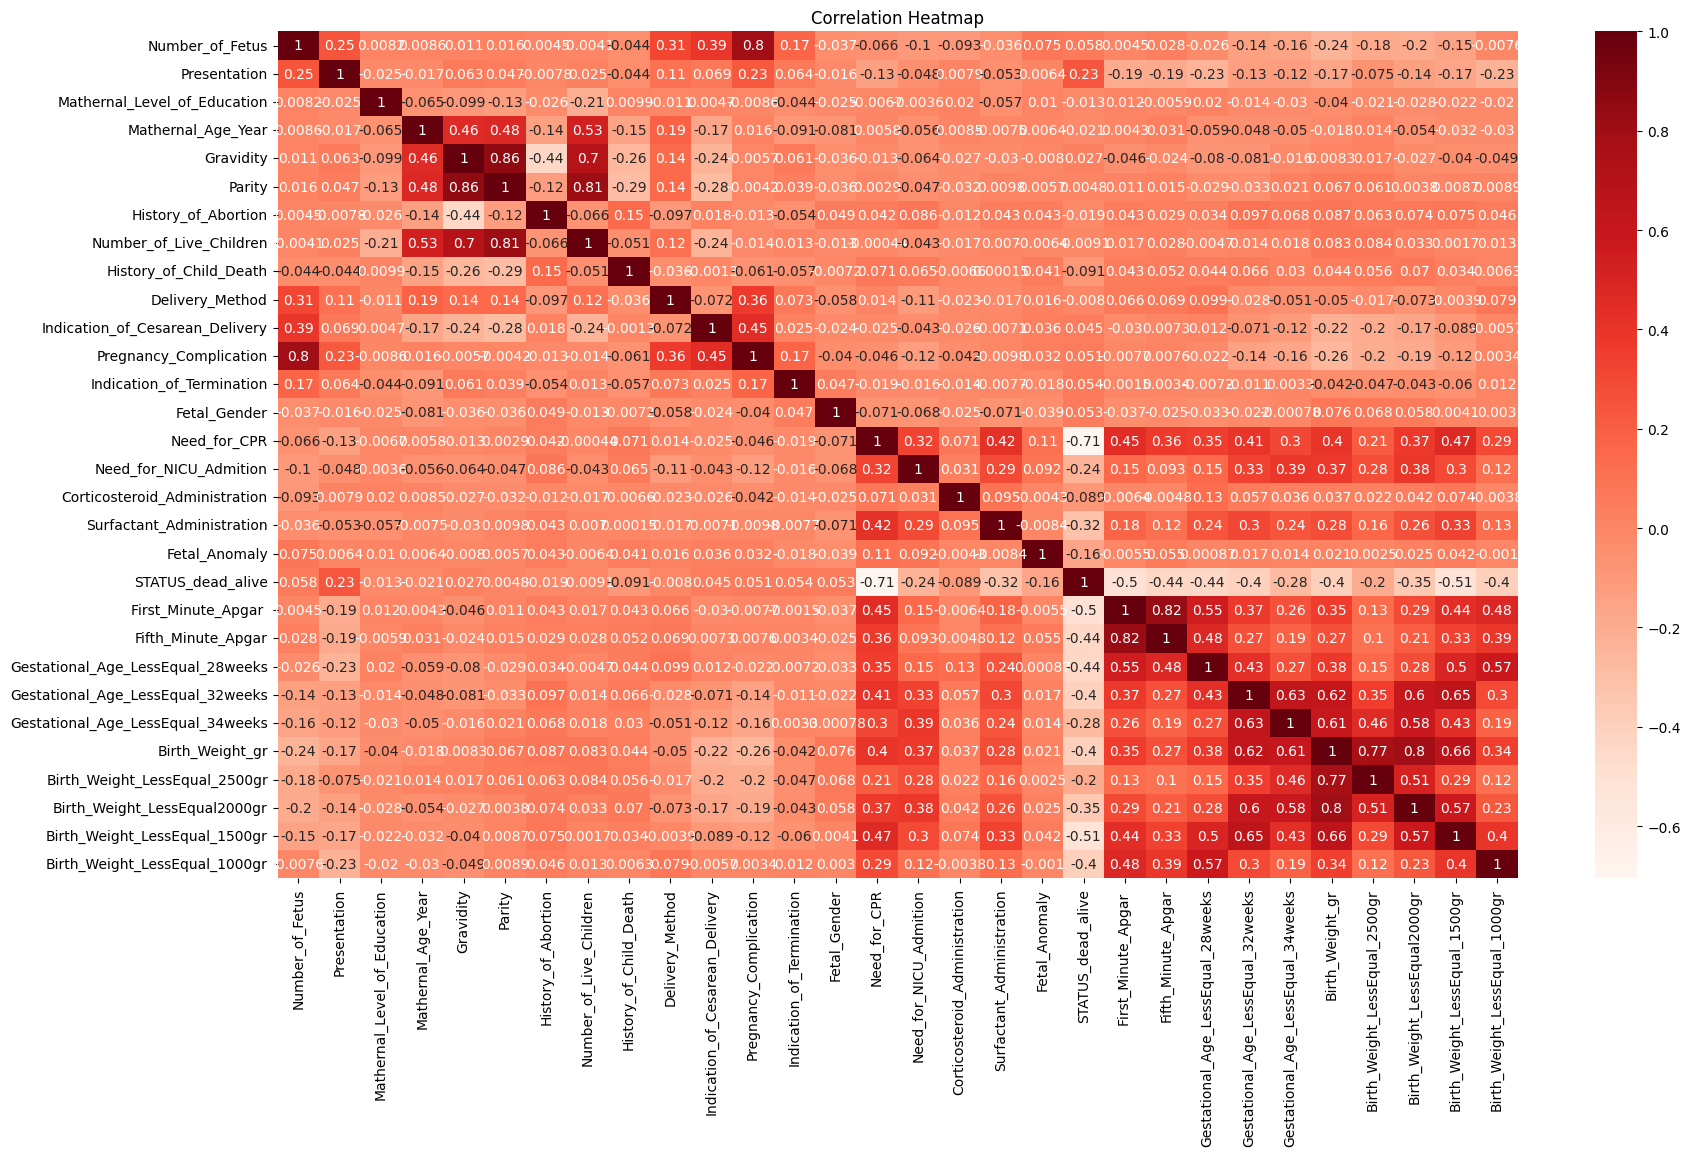

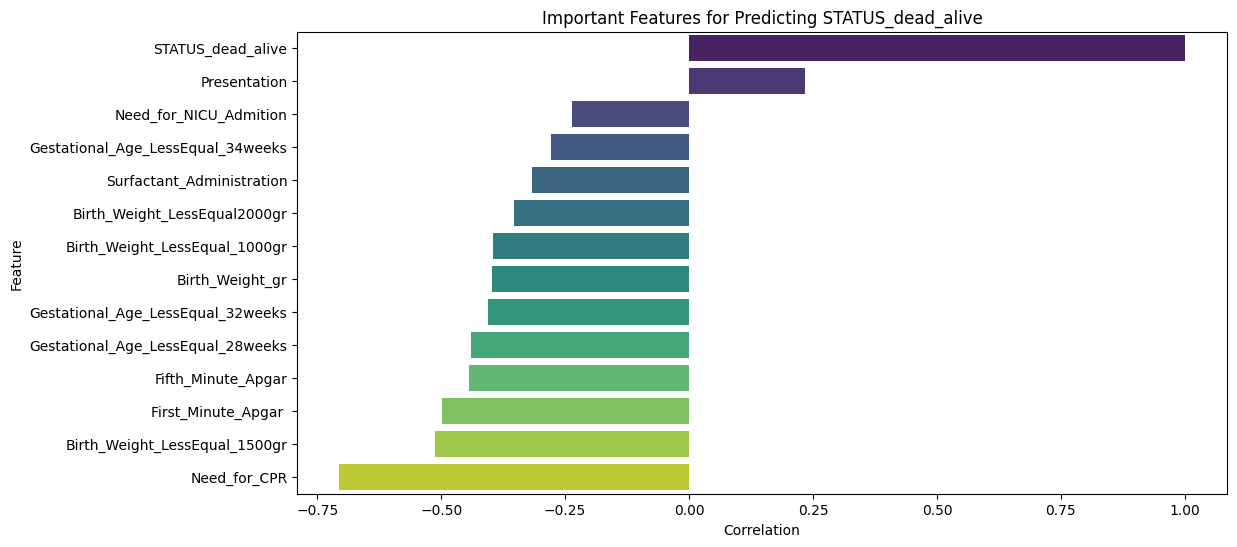

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame called 'df'

# Create a correlation heatmap
plt.figure(figsize=(20, 11))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation Heatmap")
plt.show()

# Select the target variable
target_variable = "STATUS_dead_alive"

# Calculate correlations with the target variable
cor_with_target = cor[target_variable]

# Select features with correlations larger than 0.4 or smaller than -0.4
important_features = cor_with_target[(cor_with_target > 0.2) | (cor_with_target < -0.2)]

# Create a DataFrame to store important features and their correlations
important_features_df = pd.DataFrame({'Feature': important_features.index, 'Correlation': important_features.values})

# Sort the DataFrame by correlation values in descending order
important_features_df = important_features_df.sort_values(by='Correlation', ascending=False)

# Create a bar chart to visualize important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Correlation', y='Feature', data=important_features_df, palette='viridis')
plt.title(f'Important Features for Predicting {target_variable}')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()
